#  Import Packages for Google Colab

In [ ]:
# Import basic packages for later use
import os
import shutil
from collections import OrderedDict

import json
import matplotlib.pyplot as plt
import nibabel as nib

import numpy as np
import torch

In [ ]:
!rm -r "/content/data"

In [ ]:
!find "/content/content/BraTS2021_train" -type f -name "*seg*" -exec mv {} "/content/drive/MyDrive/africa seg" \;


In [ ]:
!ls "/content/drive/MyDrive/africa seg" | wc -l


43


In [ ]:
import os

folder_path = '/content/content/BraTS2021_train'  # Replace with the actual path to your folder

for subdir, dirs, files in os.walk(folder_path):
    for folder in dirs:
        if folder.startswith('BraTS-SSA-') and folder.endswith('-000'):
            old_name = os.path.join(subdir, folder)
            new_name = os.path.join(subdir, 'BraTS2021_' + folder.split('-')[2])
            os.rename(old_name, new_name)

In [ ]:
import os

folder_path = '/content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData'  # Replace with the actual path to your folder

for subdir, dirs, files in os.walk(folder_path):
    for file_name in files:
        if file_name.startswith('BraTS-SSA-') and file_name.endswith('.nii.gz'):
            old_file_path = os.path.join(subdir, file_name)
            parts = file_name.split('-')
            file_prefix = parts[2]
            file_suffix = parts[4].split('.')[0]

            if 'seg' not in file_suffix:
                if 't1c' in file_suffix:
                    file_suffix = file_suffix.replace('t1c', 't1ce')
                if 't1n' in file_suffix:
                    file_suffix = file_suffix.replace('t1n', 't1')
                if 't2f' in file_suffix:
                    file_suffix = file_suffix.replace('t2f', 'flair')
                if 't2w' in file_suffix:
                    file_suffix = file_suffix.replace('t2w', 't2')

            new_file_name = 'BraTS2021_{}_{}.nii.gz'.format(file_prefix, file_suffix)
            new_file_path = os.path.join(subdir, new_file_name)
            os.rename(old_file_path, new_file_path)


In [ ]:
!unzip "/content/drive/MyDrive/BraTS Validation Brain Cropped.zip" -d "/content/data"

Archive:  /content/drive/MyDrive/BraTS Validation Brain Cropped.zip
   creating: /content/data/BraTS2021_00000/
   creating: /content/data/BraTS2021_00009/
   creating: /content/data/BraTS2021_00016/
   creating: /content/data/BraTS2021_00024/
   creating: /content/data/BraTS2021_00028/
   creating: /content/data/BraTS2021_00031/
   creating: /content/data/BraTS2021_00035/
   creating: /content/data/BraTS2021_00045/
   creating: /content/data/BraTS2021_00046/
   creating: /content/data/BraTS2021_00051/
   creating: /content/data/BraTS2021_00070/
   creating: /content/data/BraTS2021_00078/
   creating: /content/data/BraTS2021_00085/
   creating: /content/data/BraTS2021_00087/
   creating: /content/data/BraTS2021_00088/
   creating: /content/data/BraTS2021_00089/
   creating: /content/data/BraTS2021_00099/
   creating: /content/data/BraTS2021_00102/
   creating: /content/data/BraTS2021_00104/
   creating: /content/data/BraTS2021_00106/
   creating: /content/data/BraTS2021_00107/
   creat

In [ ]:
import os
import glob
import numpy as np
import nibabel as nib

# Define the root directory
root_directory = '/content/data'

# Find all NIfTI files with 'flair' in their filename
file_pattern = os.path.join(root_directory, '**/*flair*.nii.gz')
file_list = glob.glob(file_pattern, recursive=True)

# Process each file
for file_path in file_list:
    # Load the NIfTI file
    nifti_image = nib.load(file_path)
    data = nifti_image.get_fdata()

    # Perform some operations on the data
    # Example: Multiply all values by 2
    processed_data = data * 2

    # Create a new NIfTI image with the processed data
    processed_image = nib.Nifti1Image(processed_data, nifti_image.affine)

    # Save the new file as a replacement of the old file
    nib.save(processed_image, file_path)


[    0     1     2 ... 32608 32611 32721]


TypeError: ignored

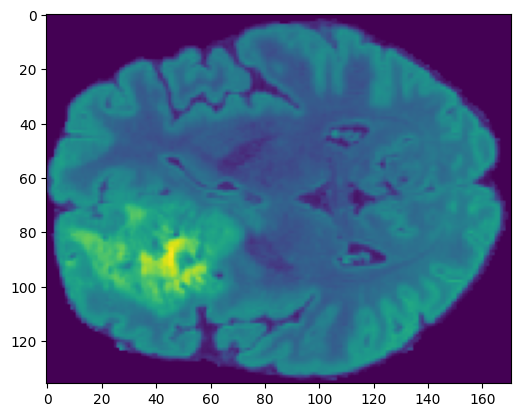

In [ ]:
from skimage.exposure import rescale_intensity
nifti_image = nib.load("/content/data/BraTS2021_00000/BraTS2021_00000_flair.nii.gz")
data = nifti_image.get_fdata()
data=rescale_intensity(data, out_range=(0, 1))
data=data*32768
data = np.abs(data.astype(np.int16))
data[data == -32768] = 0
plt.imshow(data[:,:,70])
print(np.unique(data))
affine, header = nifti_image.affine, nifti_image.header
vol = nib.nifti1.Nifti1Image(data, affine, header=header)
nib.save()

[-1.         -0.99999994 -0.99999988 ...  0.97471076  0.98134655
  0.98417151]


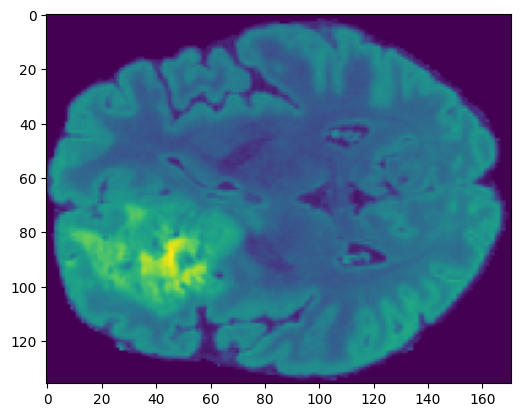

In [ ]:
import matplotlib.pyplot as plt
nifti_image = nib.load("/content/data/BraTS2021_00000/BraTS2021_00000_flair.nii.gz")
data = nifti_image.get_fdata()
plt.imshow(data[:,:,70])
print(np.unique(data))

In [ ]:
# !pip3 install hiddenlayer
!pip install --upgrade git+https://github.com/FabianIsensee/hiddenlayer.git@more_plotted_details#egg=hiddenlayer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/FabianIsensee/hiddenlayer.git (to revision more_plotted_details) to /tmp/pip-install-aymblwmy/hiddenlayer_aa995c10cdd2405690d221eaebd3853a
  Running command git clone -q https://github.com/FabianIsensee/hiddenlayer.git /tmp/pip-install-aymblwmy/hiddenlayer_aa995c10cdd2405690d221eaebd3853a
  Running command git checkout -b more_plotted_details --track origin/more_plotted_details
  Switched to a new branch 'more_plotted_details'
  Branch 'more_plotted_details' set up to track remote branch 'more_plotted_details' from 'origin'.
  Created wheel for hiddenlayer: filename=hiddenlayer-0.2-py3-none-any.whl size=19816 sha256=a4aa7fc9e9b608164195bb1e6b2d03c5e7d1137161cb49dc7eb43f8c4a9cfab6
  Stored in directory: /tmp/pip-ephem-wheel-cache-2p9hir8d/wheels/ba/64/4b/a960398ddff6d8fdbd45a3daa618eacc7806502eae6b32407f
Successfully built hiddenlayer


In [ ]:
# check whether GPU accelerated computing is available
assert torch.cuda.is_available() # if there is an error here, enable GPU in the Runtime

#  Installing nnU-Net

In [ ]:
# install nnunet

!pip install nnunet
#--use-deprecated=backtrack-on-build-failures


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.6/276.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 81.9 MB/s eta 0:00:00
  Created wheel for nnunet: filename=nnunet-1.7.1-py3-none-any.whl size=531267 sha256=dfe546b1d2c97e8b148f041609d804552e2c9f6d795190d720eb431cba7e8abc
  Stored in directory: /root/.cache/pip/wheels/0e/21/5a/48b9c7298aa4ea109aafb375f8

**Note**: you do not have to restart the Runtime even when the following error appears, this is simply due to a reinstallation of a package - so no worries.


```
WARNING: The following packages were previously imported in this runtime:

[argparse]

You must restart the runtime in order to use newly installed versions.
```

# friendly warning !!!!!!!
the nnunet in this example will run for 1000 epochs this is the default of nnunet but you can change that by going to the folders icon in colab from there

usr---->local----->lib----->python3.7------>dist-packages
----->nnunet---->training---->network_training----->nnUNetTrainerV2.py

double click this file it will open in colab in the __init__ function there is a variable __max_number_of_epochs__ change it's value from 1000 to 2  then ctrl+s and finally restart the runtime and import the packages and DON'T INSTALL THE NNUNET AGAIN  just skip the instllation cell and continue the notebook

# Verifying installation of nn-Unet

In [ ]:
# check if nnunet can be imported
import nnunet




Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet



You should read the following if the installation was successful:


```
Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

```



# 4. Connect Google Colab with GoogleDrive
This is heavily encouraged when using Google Colab, otherwise loading, accessing and saving of data checkpoints etc. is just much harder (if not impossible).

**Note**:
When ```drive.mount()``` is executed, there will appear a popup window, which will ask you which Google Account should be connected and then for permission regarding Colab accessing your GoogleDrive.

There can be some problems at this step, for me the solution was to Download the GoogleDrive Application.
You can download it from: https://www.google.com/drive/download/


If there are any problems at this stage, feel free to contact me

In [ ]:
# for mounting the drive

from google.colab import drive
drive.mount('/content/drive',force_remount = True)

drive_dir = "/content/drive/My Drive"
#mount_dir = "/content/drive/MyDrive/GraduationProjects/2022-2023/AAAM_BrainTumor_2023/Colab Notebooks"
mount_dir = "/content/drive/MyDrive"


Mounted at /content/drive


In [ ]:
assert os.path.exists(drive_dir) # if this fails, something went wrong with mounting GoogleDrive
if os.path.exists(mount_dir) is False:
    os.makedirs(mount_dir)

#  Setting up nnU-Nets folder structure and environment variables
nnUnet expects a certain folder structure and environment variables.

Roughly they tell nnUnet:
1. Where to look for stuff
2. Where to put stuff

For more information about this please check: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/setting_up_paths.md

In [ ]:
def make_if_dont_exist(folder_path,overwrite=False):
    """
    creates a folder if it does not exists
    input:
    folder_path : relative path of the folder which needs to be created
    over_write :(default: False) if True overwrite the existing folder
    """
    if os.path.exists(folder_path):

        if not overwrite:
            print(f"{folder_path} exists.")
        else:
            print(f"{folder_path} overwritten")
            shutil.rmtree(folder_path)
            os.makedirs(folder_path)

    else:
      os.makedirs(folder_path)
      print(f"{folder_path} created!")

##  Set environment Variables and creating folders

In [ ]:
# Maybe move path of preprocessed data directly on content - this may be signifcantely faster!
print("Current Working Directory {}".format(os.getcwd()))
mount_dir="/content"
path_dict = {
     #"nnUNet_raw_data_base" : os.path.join(mount_dir, "nnUNet_raw"),
     #"nnUNet_preprocessed" : os.path.join(mount_dir, "nnUNet_preprocessed"), # 1 experiment: 1 epoch took 112s
     #"nnUNet_preprocessed" : os.path.join(base_dir, "content/drive/MyDrive/Colab Notebooks/nnUNet_preprocessed"), # 1 experiment: 1 epoch took 108s -> seems faster take this
     "nnUNet_raw_data_base" : os.path.join(mount_dir, "nnUNet_raw"),
     "nnUNet_preprocessed" : os.path.join(mount_dir, "nnUNet_preprocessed"),
     "RESULTS_FOLDER" : os.path.join(mount_dir, "/content/drive/MyDrive/Colab Notebooks (1)/nnUNet_Results_Folder"),
        #  "RAW_DATA_PATH" : os.path.join(mount_dir, "RawData"),
}

# Write paths to environment variables
for env_var, path in path_dict.items():
  os.environ[env_var] = path

# Check whether all environment variables are set correct!
for env_var, path in path_dict.items():
  if os.getenv(env_var) != path:
    print("Error:")
    print("Environment Variable {} is not set correctly!".format(env_var))
    print("Should be {}".format(path))
    print("Variable is {}".format(os.getenv(env_var)))
  make_if_dont_exist(path, overwrite=False)

print("If No Error Occured Continue Forward. =)")

Current Working Directory /content
/content/nnUNet_raw created!
/content/nnUNet_preprocessed created!
/content/drive/MyDrive/Colab Notebooks (1)/nnUNet_Results_Folder exists.
If No Error Occured Continue Forward. =)


In [ ]:
!zip -r "/content/drive/MyDrive/africa man/archive.zip" "/content/BraTS2021_train"


  adding: content/BraTS2021_train/ (stored 0%)
  adding: content/BraTS2021_train/BraTS2021_00121/ (stored 0%)
  adding: content/BraTS2021_train/BraTS2021_00121/BraTS2021_00121_t1.nii.gz (deflated 2%)
  adding: content/BraTS2021_train/BraTS2021_00121/BraTS2021_00121_t1ce.nii.gz (deflated 2%)
  adding: content/BraTS2021_train/BraTS2021_00121/BraTS2021_00121_flair.nii.gz (deflated 2%)
  adding: content/BraTS2021_train/BraTS2021_00121/BraTS2021_00121_t2.nii.gz (deflated 2%)
  adding: content/BraTS2021_train/BraTS2021_00121/BraTS2021_00121_seg.nii.gz (deflated 36%)
  adding: content/BraTS2021_train/BraTS2021_00014/ (stored 0%)
  adding: content/BraTS2021_train/BraTS2021_00014/BraTS2021_00014_t1ce.nii.gz (deflated 2%)
  adding: content/BraTS2021_train/BraTS2021_00014/BraTS2021_00014_flair.nii.gz (deflated 2%)
  adding: content/BraTS2021_train/BraTS2021_00014/BraTS2021_00014_t2.nii.gz (deflated 2%)
  adding: content/BraTS2021_train/BraTS2021_00014/BraTS2021_00014_seg.nii.gz (deflated 65%)
  a

In [ ]:
import shutil
import os

def copy_folder_contents(source_folder, destination_folder):
    # Get the list of files and subdirectories in the source folder
    contents = os.listdir(source_folder)

    # Iterate over each item in the source folder
    for item in contents:
        # Create the full path of the item in the source folder
        source_path = os.path.join(source_folder, item)

        # Create the full path of the item in the destination folder
        destination_path = os.path.join(destination_folder, item)

        # Copy the item to the destination folder
        if os.path.isdir(source_path):
            # If the item is a directory, recursively copy its contents
            shutil.copytree(source_path, destination_path)
        else:
            # If the item is a file, copy it
            shutil.copy2(source_path, destination_path)

# Example usage
source_folder = '/content/drive/MyDrive/model nezar/resnet7/ResNet-7(30 ep) - FLAIR Synth from T2 - BraTS Validation - Brain Cropped'
destination_folder = '/content/resnet7flair'

copy_folder_contents(source_folder, destination_folder)


KeyboardInterrupt: ignored

In [ ]:
#!unzip "/content/drive/MyDrive/GraduationProjects/2022-2023/AAAM_BrainTumor_2023/nnUNet_preprocessed.zip"
!unzip "/content/drive/MyDrive/BRATS-AFRICA/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData.zip" -d "/content"
# -d "/content/validate/t2"
# os.chdir(base_dir)

Archive:  /content/drive/MyDrive/BRATS-AFRICA/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData.zip
   creating: /content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/
   creating: /content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BraTS-SSA-00121-000/
  inflating: /content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BraTS-SSA-00121-000/BraTS-SSA-00121-000-seg.nii.gz  
  inflating: /content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BraTS-SSA-00121-000/BraTS-SSA-00121-000-t1n.nii.gz  
  inflating: /content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BraTS-SSA-00121-000/BraTS-SSA-00121-000-t2f.nii.gz  
  inflating: /content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BraTS-SSA-00121-000/BraTS-SSA-00121-000-t2w.nii.gz  
  inflating: /content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BraTS-SSA-00121-000/BraTS-SSA-00121-000-t1c.nii.gz  
   creating: /content/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/BraTS-SSA-00112-000/
  inflating: /content/ASN

In [ ]:
import os
import shutil

# Set the search parameters
word_to_find = "t2"
first_parent_folder_path = "/content/content/drive/MyDrive/Black T1 BraTS Validation Brain Cropped"
second_parent_folder_path = "/content/content/drive/MyDrive/Black T2 BraTS Validation Brain Cropped"

# Search for files with the specific word in the first parent folder
first_parent_files = []
for root, dirs, files in os.walk(first_parent_folder_path):
    for file in files:
        if word_to_find in file:
            first_parent_files.append(os.path.join(root, file))

# Search for files with the same specific word in the second parent folder
second_parent_files = []
for root, dirs, files in os.walk(second_parent_folder_path):
    for file in files:
        if word_to_find in file:
            second_parent_files.append(os.path.join(root, file))

# Find matching files and replace them in the first parent folder with the ones from the second parent folder
for second_parent_file in second_parent_files:
    first_parent_file = [file for file in first_parent_files if os.path.basename(file) == os.path.basename(second_parent_file)]
    if first_parent_file:
        shutil.copy2(second_parent_file, first_parent_file[0])


In [ ]:
# For data conversion
!tar -xvf  "/content/BraTS2021_Training_Data.tar" -C "/content/Brats"

In [ ]:
from batchgenerators.utilities.file_and_folder_operations import *
from nnunet.paths import nnUNet_raw_data
import SimpleITK as sitk
import shutil


def copy_BraTS_segmentation_and_convert_labels(in_file, out_file):
    # use this for segmentation only!!!
    # nnUNet wants the labels to be continuous. BraTS is 0, 1, 2, 4 -> we make that into 0, 1, 2, 3
    img = sitk.ReadImage(in_file)
    img_npy = sitk.GetArrayFromImage(img)

    uniques = np.unique(img_npy)
    for u in uniques:
        if u not in [0, 1, 2, 4]:
            raise RuntimeError('unexpected label')

    seg_new = np.zeros_like(img_npy)
    seg_new[img_npy == 4] = 3
    seg_new[img_npy == 1] = 1
    seg_new[img_npy == 2] = 2
    img_corr = sitk.GetImageFromArray(seg_new)
    img_corr.CopyInformation(img)
    sitk.WriteImage(img_corr, out_file)


if __name__ == "__main__":
    """
    REMEMBER TO CONVERT LABELS BACK TO BRATS CONVENTION AFTER PREDICTION!
    """

    task_name = "Task502_BraTS2021"
    """
     Path to unzipped data should be in the created Raw data folder
     """
    downloaded_data_dir = "/content/drive/MyDrive/nnunetrawbias/SampleBraTS2150_Examples"

    target_base = join(nnUNet_raw_data, task_name)
    target_imagesTr = join(target_base, "imagesTr")
    target_imagesVal = join(target_base, "imagesVal")
    target_imagesTs = join(target_base, "imagesTs")
    target_labelsTr = join(target_base, "labelsTr")

    maybe_mkdir_p(target_imagesTr)
    maybe_mkdir_p(target_imagesVal)
    maybe_mkdir_p(target_imagesTs)
    maybe_mkdir_p(target_labelsTr)

    patient_names = []

    for p in subdirs(downloaded_data_dir, join=False):
        patdir = join(downloaded_data_dir, p)
        patient_name = p
        patient_names.append(patient_name)
        t1 = join(patdir, p + "_t1.nii.gz")
        t1c = join(patdir, p + "_t1ce.nii.gz")
        t2 = join(patdir, p + "_t2.nii.gz")
        flair = join(patdir, p + "_flair.nii.gz")
        seg = join(patdir, p + "_seg.nii.gz")

        assert all([
            isfile(t1),
            isfile(t1c),
            isfile(t2),
            isfile(flair),
            isfile(seg)
        ]), "%s" % patient_name

        shutil.copy(t1, join(target_imagesTr, patient_name + "_0000.nii.gz"))
        shutil.copy(t1c, join(target_imagesTr, patient_name + "_0001.nii.gz"))
        shutil.copy(t2, join(target_imagesTr, patient_name + "_0002.nii.gz"))
        shutil.copy(flair, join(target_imagesTr, patient_name + "_0003.nii.gz"))

        copy_BraTS_segmentation_and_convert_labels(seg, join(target_labelsTr, patient_name + ".nii.gz"))


    json_dict = OrderedDict()
    json_dict['name'] = "BraTS2021"
    json_dict['description'] = "nothing"
    json_dict['tensorImageSize'] = "4D"
    json_dict['reference'] = "see BraTS2021"
    json_dict['licence'] = "see BraTS2021 license"
    json_dict['release'] = "0.0"
    json_dict['modality'] = {
        "0": "T1",
        "1": "T1ce",
        "2": "T2",
        "3": "FLAIR"
    }
    json_dict['labels'] = {
        "0": "background",
        "1": "edema",
        "2": "non-enhancing",
        "3": "enhancing",
    }
    json_dict['numTraining'] = len(patient_names)
    json_dict['numTest'] = 0
    json_dict['training'] = [{'image': "./imagesTr/%s.nii.gz" % i, "label": "./labelsTr/%s.nii.gz" % i} for i in
                             patient_names]
    json_dict['test'] = []

    save_json(json_dict, join(target_base, "dataset.json"))

    # downloaded_data_dir = "/home/sdp/MLPERF/Brats2019_DATA/MICCAI_BraTS_2019_Data_Validation"
    #
    # for p in subdirs(downloaded_data_dir, join=False):
    #     patdir = join(downloaded_data_dir, p)
    #     patient_name = p
    #     t1 = join(patdir, p + "_t1.nii.gz")
    #     t1c = join(patdir, p + "_t1ce.nii.gz")
    #     t2 = join(patdir, p + "_t2.nii.gz")
    #     flair = join(patdir, p + "_flair.nii.gz")
    #
    #     assert all([
    #         isfile(t1),
    #         isfile(t1c),
    #         isfile(t2),
    #         isfile(flair),
    #     ]), "%s" % patient_name
    #
    #     shutil.copy(t1, join(target_imagesVal, patient_name + "_0000.nii.gz"))
    #     shutil.copy(t1c, join(target_imagesVal, patient_name + "_0001.nii.gz"))
    #     shutil.copy(t2, join(target_imagesVal, patient_name + "_0002.nii.gz"))
    #     shutil.copy(flair, join(target_imagesVal, patient_name + "_0003.nii.gz"))

    """
    #I dont have the testing data
    downloaded_data_dir = "/home/fabian/Downloads/BraTS2018_train_val_test_data/MICCAI_BraTS_2018_Data_Testing_FIsensee"

    for p in subdirs(downloaded_data_dir, join=False):
        patdir = join(downloaded_data_dir, p)
        patient_name = p
        t1 = join(patdir, p + "_t1.nii.gz")
        t1c = join(patdir, p + "_t1ce.nii.gz")
        t2 = join(patdir, p + "_t2.nii.gz")
        flair = join(patdir, p + "_flair.nii.gz")

        assert all([
            isfile(t1),
            isfile(t1c),
            isfile(t2),
            isfile(flair),
        ]), "%s" % patient_name

        shutil.copy(t1, join(target_imagesTs, patient_name + "_0000.nii.gz"))
        shutil.copy(t1c, join(target_imagesTs, patient_name + "_0001.nii.gz"))
        shutil.copy(t2, join(target_imagesTs, patient_name + "_0002.nii.gz"))
        shutil.copy(flair, join(target_imagesTs, patient_name + "_0003.nii.gz"))"""


## Extracting Rule Based Parameters
This will preprocess the dataset to allow fast training and saves it into the "nnUNet_preprocessed" folder.
Further rule based parameters will be extracted in the planning step.

In [ ]:
!nnUNet_plan_and_preprocess -t 502 --verify_dataset_integrity



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

Verifying training set
checking case BraTS2021_00000
checking case BraTS2021_00002
checking case BraTS2021_00003
checking case BraTS2021_00005
checking case BraTS2021_00006
checking case BraTS2021_00008
checking case BraTS2021_00009
checking case BraTS2021_00011
checking case BraTS2021_00012
checking case BraTS2021_00014
checking case BraTS2021_00016
checking case BraTS2021_00017
checking case BraTS2021_00018
checking case BraTS2021_00019
checking case BraTS2021_00020
checking case BraTS2021_00021
checking case BraTS2021_00022
checking case BraTS2021_00024
checking case BraTS2021_00025
checking case BraTS2021_00026
checking case B

In [ ]:
# train the 2d nnUnet with Task 501 and Cross Validation Split 0
!nnUNet_train 2d nnUNetTrainerV2 502 0 -c

# training the Full Model will take quite a while - therefore it is advised to interrupt the training after some time



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

###############################################
I am running the following nnUNet: 2d
My trainer class is:  <class 'nnunet.training.network_training.nnUNetTrainerV2.nnUNetTrainerV2'>
For that I will be using the following configuration:
num_classes:  3
modalities:  {0: 'T1', 1: 'T1ce', 2: 'T2', 3: 'FLAIR'}
use_mask_for_norm OrderedDict([(0, True), (1, True), (2, True), (3, True)])
keep_only_largest_region None
min_region_size_per_class None
min_size_per_class None
normalization_schemes OrderedDict([(0, 'nonCT'), (1, 'nonCT'), (2, 'nonCT'), (3, 'nonCT')])
stages...

stage:  0
{'batch_size': 106, 'num_pool_per_axis': [5, 5], 'patch_

In [ ]:
!nvidia-smi

Tue Mar 21 19:44:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nnUNet_predict -h

In [ ]:
!unzip "/content/drive/MyDrive/T2-FLAIR/SqzAtt(16 ep) - T2 Synth from FLAIR - BraTS Validation - Brain Cropped.zip.zip" -d "/content/squeeze t2"

Archive:  /content/drive/MyDrive/T2-FLAIR/SqzAtt(16 ep) - T2 Synth from FLAIR - BraTS Validation - Brain Cropped.zip.zip
   creating: /content/squeeze t2/BraTS2021_00000/
   creating: /content/squeeze t2/BraTS2021_00009/
   creating: /content/squeeze t2/BraTS2021_00016/
   creating: /content/squeeze t2/BraTS2021_00024/
   creating: /content/squeeze t2/BraTS2021_00028/
   creating: /content/squeeze t2/BraTS2021_00031/
   creating: /content/squeeze t2/BraTS2021_00035/
   creating: /content/squeeze t2/BraTS2021_00045/
   creating: /content/squeeze t2/BraTS2021_00046/
   creating: /content/squeeze t2/BraTS2021_00051/
   creating: /content/squeeze t2/BraTS2021_00070/
   creating: /content/squeeze t2/BraTS2021_00078/
   creating: /content/squeeze t2/BraTS2021_00085/
   creating: /content/squeeze t2/BraTS2021_00087/
   creating: /content/squeeze t2/BraTS2021_00088/
   creating: /content/squeeze t2/BraTS2021_00089/
   creating: /content/squeeze t2/BraTS2021_00099/
   creating: /content/squeeze

In [ ]:
import os

# set the path to the folder containing the files
folder_path = '/content/data'


# iterate over the files in the folder
for root, dirs, files in os.walk(folder_path):
    # check if the file name contains the search string
    for file in files:
      print(file)
      if "flair" in file:
          # replace the search string with the replace string
          new_filename = file.replace("flair", "0003")
          # rename the file
          os.rename(os.path.join(root, file), os.path.join(root, new_filename))
      if "t2" in file:
          # replace the search string with the replace string
          new_filename = file.replace("t2", "0002")
          # rename the file
          os.rename(os.path.join(root, file), os.path.join(root, new_filename))
      if "t1." in file:
          # replace the search string with the replace string
          new_filename = file.replace("t1.", "0000.")
          # rename the file
          os.rename(os.path.join(root, file), os.path.join(root, new_filename))
      if "t1ce" in file:
          # replace the search string with the replace string
          print(file)
          new_filename = file.replace("t1ce", "0001")
          print(file)
          # rename the file
          os.rename(os.path.join(root, file), os.path.join(root, new_filename))




BraTS Validation Brain Cropped.zip
BraTS2021_00480_t1.nii.gz
BraTS2021_00480_t1ce.nii.gz
BraTS2021_00480_t1ce.nii.gz
BraTS2021_00480_t1ce.nii.gz
BraTS2021_00480_t2.nii.gz
BraTS2021_00480_flair.nii.gz
BraTS2021_00480_seg.nii.gz
BraTS2021_00313_flair.nii.gz
BraTS2021_00313_seg.nii.gz
BraTS2021_00313_t2.nii.gz
BraTS2021_00313_t1.nii.gz
BraTS2021_00313_t1ce.nii.gz
BraTS2021_00313_t1ce.nii.gz
BraTS2021_00313_t1ce.nii.gz
BraTS2021_00334_flair.nii.gz
BraTS2021_00334_seg.nii.gz
BraTS2021_00334_t2.nii.gz
BraTS2021_00334_t1.nii.gz
BraTS2021_00334_t1ce.nii.gz
BraTS2021_00334_t1ce.nii.gz
BraTS2021_00334_t1ce.nii.gz
BraTS2021_01614_t2.nii.gz
BraTS2021_01614_t1ce.nii.gz
BraTS2021_01614_t1ce.nii.gz
BraTS2021_01614_t1ce.nii.gz
BraTS2021_01614_seg.nii.gz
BraTS2021_01614_flair.nii.gz
BraTS2021_01614_t1.nii.gz
BraTS2021_00375_t1.nii.gz
BraTS2021_00375_seg.nii.gz
BraTS2021_00375_flair.nii.gz
BraTS2021_00375_t1ce.nii.gz
BraTS2021_00375_t1ce.nii.gz
BraTS2021_00375_t1ce.nii.gz
BraTS2021_00375_t2.nii.gz
BraTS

In [ ]:
import os
import shutil

parent_folder = "/content/data"

# Move all files to the parent folder
for root, dirs, files in os.walk(parent_folder):
    for file in files:
        src_path = os.path.join(root, file)
        dst_path = os.path.join(parent_folder, file)
        shutil.move(src_path, dst_path)

# Delete all subdirectories
for dir in os.listdir(parent_folder):
    dir_path = os.path.join(parent_folder, dir)
    if os.path.isdir(dir_path):
        os.rmdir(dir_path)

In [ ]:
import os

folder_path = "/content/data"
word_to_search = "seg"

for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if word_to_search in file_name:
        os.remove(file_path)


## prediction using our model

In [ ]:
!nnUNet_predict -i "/content/data"  -o "/content/drive/MyDrive/validation_vanilla_nnunet" -t 501  -chk "Copy of model_latest" -m 3d_fullres

Streaming output truncated to the last 5000 lines.
no resampling necessary
preprocessing /content/drive/MyDrive/validation_vanilla_nnunet/BraTS2021_00126.nii.gz
using preprocessor GenericPreprocessor
predicting /content/drive/MyDrive/validation_vanilla_nnunet/BraTS2021_00107.nii.gz
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (4, 138, 164, 136)
patch size: [128 128 128]
steps (x, y, and z): [[0, 10], [0, 36], [0, 8]]
number of tiles: 8
using precomputed Gaussian
before crop: (4, 140, 164, 140) after crop: (4, 140, 164, 140) spacing: [1. 1. 1.] 

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (4, 140, 164, 140)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (4, 140, 164, 140)} 

(4, 140, 164, 140)
prediction done
preprocessing /content/drive/MyDrive/validation_vanilla_nnunet/BraTS2021_00136.nii.gz


In [ ]:
!nnUNet_predict -i "/content/drive/MyDrive/BraTS2021_0002"  -o "/content/drive/MyDrive/BraTS2021_00002" -t 501  -chk "Copy of model_latest" -m 3d_fullres



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

using model stored in  /content/drive/MyDrive/Colab Notebooks (1)/nnUNet_Results_Folder/nnUNet/3d_fullres/Task501_BraTS2021/nnUNetTrainerV2__nnUNetPlansv2.1
This model expects 4 input modalities for each image
Found 1 unique case ids, here are some examples: ['BraTS2021_0002']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
number of cases: 1
number of cases that still need to be predicted: 1
emptying cuda cache
loading parameters for folds, None
folds is None so we will automatically look for output folders (not using 'all'!)
found the following folds:  ['/content/drive/MyDr

In [ ]:
!nnUNet_predict -i "/content/Black T2 BraTS Validation Brain Cropped"  -o "/content/drive/MyDrive/predict_black/t2" -t 501  -chk "Copy of model_latest" -m 3d_fullres

Streaming output truncated to the last 5000 lines.
no resampling necessary
preprocessing /content/drive/MyDrive/predict_black/t2/BraTS2021_00136.nii.gz
using preprocessor GenericPreprocessor
predicting /content/drive/MyDrive/predict_black/t2/BraTS2021_00117.nii.gz
debug: mirroring True mirror_axes (0, 1, 2)
step_size: 0.5
do mirror: True
data shape: (4, 138, 159, 142)
patch size: [128 128 128]
steps (x, y, and z): [[0, 10], [0, 31], [0, 14]]
number of tiles: 8
using precomputed Gaussian
before crop: (4, 139, 173, 135) after crop: (4, 139, 173, 135) spacing: [1. 1. 1.] 

no resampling necessary
no resampling necessary
before: {'spacing': array([1., 1., 1.]), 'spacing_transposed': array([1., 1., 1.]), 'data.shape (data is transposed)': (4, 139, 173, 135)} 
after:  {'spacing': array([1., 1., 1.]), 'data.shape (data is resampled)': (4, 139, 173, 135)} 

(4, 139, 173, 135)
prediction done
preprocessing /content/drive/MyDrive/predict_black/t2/BraTS2021_00140.nii.gz
using preprocessor Generic

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

In [ ]:
import os
import shutil

parent_folder = "/content/T2 Synthesized BraTS Validation Brain Cropped"
target_folder = "/content/drive/MyDrive/true_seg_for_validation"
keyword = "seg"

for root, dirs, files in os.walk(parent_folder):
    for file in files:
        if keyword in file:
            file_path = os.path.join(root, file)
            shutil.move(file_path, target_folder)

In [ ]:
import os

folder_path = "/content/drive/MyDrive/predict_t1&t2_black"

num_files = len([f for f in os.listdir(folder_path)])

print("Number of files in folder:", num_files)


FileNotFoundError: ignored

In [ ]:
! rm -r "/content/resnet7t2"

In [ ]:
!zip -r "/content/predict.zip" "/content/predict"


  adding: content/predict/ (stored 0%)
  adding: content/predict/prediction_time.txt (stored 0%)
  adding: content/predict/BraTS2021_00452.nii.gz (deflated 10%)
  adding: content/predict/plans.pkl (deflated 93%)
